# Import dependencies

In [1]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [4]:
%matplotlib inline
from sgm.dependencies import *

# Initialize untrained agent

In [5]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [6]:
# tf.debugging.set_log_device_placement(True)
tf.test.is_gpu_available()

True

In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14394976882020200016
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9674443083634320944
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10990990132
locality {
  bus_id: 2
  numa_node: 1
  links {
  }
}
incarnation: 2685345787653953367
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:8a:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 18291326206388794560
physical_device_desc: "device: XLA_GPU device"
]


In [8]:
tf.reset_default_graph()

In [9]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 30
env_name = 'Maze6x6'  # Choose one of the environments shown above. 
resize_factor = 5  # Inflate the environment to increase the difficulty.
thin = True # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

/home/blbudima/miniconda3/envs/sgm/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Train the agent

In [10]:
# from sgm.trainer import train_eval

# train_eval(agent,
#           tf_env,
#           eval_tf_env,
#           initial_collect_steps=1000,
#           eval_interval=1000,
#           num_eval_episodes=10,
#           num_iterations=50000,
#           save_model_dir=model_dir,
#           experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Saving checkpoints to directory /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



  2%|▏         | 994/50000 [00:16<09:58, 81.92it/s] 

Saved checkpoint for step 1000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-1
INFO:tensorflow:step = 1000, loss = 3.005336
INFO:tensorflow:66.745 steps/sec
INFO:tensorflow:step = 1000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.80
INFO:tensorflow:		 predicted_dist = 21.0 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -25.50
INFO:tensorflow:		 predicted_dist = 20.7 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -28.10
INFO:tensorflow:		 predicted_dist = 21.6 (0.7)
INFO:tensorflow:	 eval_time = 4.54


  4%|▍         | 1991/50000 [00:32<08:17, 96.54it/s]  

Saved checkpoint for step 2000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-2
INFO:tensorflow:step = 2000, loss = 2.435564
INFO:tensorflow:95.656 steps/sec
INFO:tensorflow:step = 2000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -21.90
INFO:tensorflow:		 predicted_dist = 20.2 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -30.00
INFO:tensorflow:		 predicted_dist = 23.2 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -25.90
INFO:tensorflow:		 predicted_dist = 24.7 (1.2)
INFO:tensorflow:	 eval_time = 3.56


  6%|▌         | 2999/50000 [00:48<13:07, 59.68it/s]  

Saved checkpoint for step 3000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-3
INFO:tensorflow:step = 3000, loss = 2.638076
INFO:tensorflow:93.468 steps/sec
INFO:tensorflow:step = 3000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -14.20
INFO:tensorflow:		 predicted_dist = 14.3 (2.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -21.20
INFO:tensorflow:		 predicted_dist = 18.2 (3.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -23.70
INFO:tensorflow:		 predicted_dist = 22.2 (1.9)
INFO:tensorflow:	 eval_time = 3.19


  8%|▊         | 3997/50000 [01:03<09:14, 82.93it/s]  

Saved checkpoint for step 4000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-4
INFO:tensorflow:step = 4000, loss = 2.907551
INFO:tensorflow:93.340 steps/sec
INFO:tensorflow:step = 4000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -13.30
INFO:tensorflow:		 predicted_dist = 15.1 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.80
INFO:tensorflow:		 predicted_dist = 18.2 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -24.00
INFO:tensorflow:		 predicted_dist = 22.9 (1.2)
INFO:tensorflow:	 eval_time = 2.98


 10%|▉         | 4993/50000 [01:19<08:59, 83.49it/s]  

Saved checkpoint for step 5000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-5
INFO:tensorflow:step = 5000, loss = 3.445031
INFO:tensorflow:89.243 steps/sec
INFO:tensorflow:step = 5000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.60
INFO:tensorflow:		 predicted_dist = 9.1 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.70
INFO:tensorflow:		 predicted_dist = 13.7 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -21.80
INFO:tensorflow:		 predicted_dist = 21.6 (1.6)
INFO:tensorflow:	 eval_time = 2.52


 12%|█▏        | 5992/50000 [01:33<08:41, 84.37it/s]  

Saved checkpoint for step 6000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-6
INFO:tensorflow:step = 6000, loss = 2.877399
INFO:tensorflow:94.149 steps/sec
INFO:tensorflow:step = 6000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 9.1 (2.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.40
INFO:tensorflow:		 predicted_dist = 16.4 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.40
INFO:tensorflow:		 predicted_dist = 20.7 (1.5)
INFO:tensorflow:	 eval_time = 2.69


 14%|█▍        | 6998/50000 [01:49<08:45, 81.80it/s]  

Saved checkpoint for step 7000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-7
INFO:tensorflow:step = 7000, loss = 3.175477
INFO:tensorflow:91.250 steps/sec
INFO:tensorflow:step = 7000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.90
INFO:tensorflow:		 predicted_dist = 9.4 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.00
INFO:tensorflow:		 predicted_dist = 12.8 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.60
INFO:tensorflow:		 predicted_dist = 18.4 (1.7)
INFO:tensorflow:	 eval_time = 2.53


 16%|█▌        | 7993/50000 [02:04<08:12, 85.33it/s]  

Saved checkpoint for step 8000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-8
INFO:tensorflow:step = 8000, loss = 3.428339
INFO:tensorflow:90.540 steps/sec
INFO:tensorflow:step = 8000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.40
INFO:tensorflow:		 predicted_dist = 6.9 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.30
INFO:tensorflow:		 predicted_dist = 13.8 (2.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.90
INFO:tensorflow:		 predicted_dist = 21.9 (2.1)
INFO:tensorflow:	 eval_time = 2.69


 18%|█▊        | 8991/50000 [02:19<08:18, 82.32it/s]  

Saved checkpoint for step 9000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-9
INFO:tensorflow:step = 9000, loss = 3.085041
INFO:tensorflow:92.176 steps/sec
INFO:tensorflow:step = 9000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.70
INFO:tensorflow:		 predicted_dist = 6.3 (2.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.10
INFO:tensorflow:		 predicted_dist = 10.8 (2.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -21.40
INFO:tensorflow:		 predicted_dist = 18.7 (2.4)
INFO:tensorflow:	 eval_time = 2.71


 20%|█▉        | 9999/50000 [02:34<12:09, 54.85it/s]  

Saved checkpoint for step 10000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-10
INFO:tensorflow:step = 10000, loss = 3.035228
INFO:tensorflow:89.918 steps/sec
INFO:tensorflow:step = 10000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 5.6 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.10
INFO:tensorflow:		 predicted_dist = 9.5 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.80
INFO:tensorflow:		 predicted_dist = 14.8 (1.8)
INFO:tensorflow:	 eval_time = 2.54


 22%|██▏       | 10995/50000 [02:49<08:16, 78.55it/s]  

Saved checkpoint for step 11000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-11
INFO:tensorflow:step = 11000, loss = 3.466373
INFO:tensorflow:90.148 steps/sec
INFO:tensorflow:step = 11000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.10
INFO:tensorflow:		 predicted_dist = 6.1 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.60
INFO:tensorflow:		 predicted_dist = 10.5 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.80
INFO:tensorflow:		 predicted_dist = 14.2 (1.8)
INFO:tensorflow:	 eval_time = 2.64


 24%|██▍       | 11999/50000 [03:04<17:31, 36.14it/s]  

Saved checkpoint for step 12000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-12
INFO:tensorflow:step = 12000, loss = 3.693969
INFO:tensorflow:90.904 steps/sec
INFO:tensorflow:step = 12000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.90
INFO:tensorflow:		 predicted_dist = 4.8 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.80
INFO:tensorflow:		 predicted_dist = 9.8 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -24.30
INFO:tensorflow:		 predicted_dist = 14.2 (2.5)
INFO:tensorflow:	 eval_time = 2.78


 26%|██▌       | 12999/50000 [03:20<10:49, 56.94it/s]  

Saved checkpoint for step 13000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-13
INFO:tensorflow:step = 13000, loss = 3.149224
INFO:tensorflow:89.594 steps/sec
INFO:tensorflow:step = 13000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 5.7 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.30
INFO:tensorflow:		 predicted_dist = 8.6 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.90
INFO:tensorflow:		 predicted_dist = 12.4 (1.7)
INFO:tensorflow:	 eval_time = 2.56


 28%|██▊       | 13994/50000 [03:35<08:34, 70.04it/s]  

Saved checkpoint for step 14000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-14
INFO:tensorflow:step = 14000, loss = 3.256004
INFO:tensorflow:90.898 steps/sec
INFO:tensorflow:step = 14000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.10
INFO:tensorflow:		 predicted_dist = 5.0 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.70
INFO:tensorflow:		 predicted_dist = 9.0 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.20
INFO:tensorflow:		 predicted_dist = 16.1 (2.3)
INFO:tensorflow:	 eval_time = 2.77


 30%|██▉       | 14994/50000 [03:50<06:42, 86.89it/s]  

Saved checkpoint for step 15000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-15
INFO:tensorflow:step = 15000, loss = 3.161441
INFO:tensorflow:90.047 steps/sec
INFO:tensorflow:step = 15000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 5.5 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.50
INFO:tensorflow:		 predicted_dist = 10.0 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.90
INFO:tensorflow:		 predicted_dist = 13.7 (2.9)
INFO:tensorflow:	 eval_time = 2.49


 32%|███▏      | 15999/50000 [04:05<09:04, 62.44it/s]

Saved checkpoint for step 16000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-16
INFO:tensorflow:step = 16000, loss = 3.560533
INFO:tensorflow:93.841 steps/sec
INFO:tensorflow:step = 16000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.70
INFO:tensorflow:		 predicted_dist = 6.4 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.70
INFO:tensorflow:		 predicted_dist = 9.6 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.40
INFO:tensorflow:		 predicted_dist = 14.7 (1.8)
INFO:tensorflow:	 eval_time = 2.53


 34%|███▍      | 16992/50000 [04:21<06:49, 80.56it/s]  

Saved checkpoint for step 17000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-17
INFO:tensorflow:step = 17000, loss = 3.767707
INFO:tensorflow:86.936 steps/sec
INFO:tensorflow:step = 17000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.00
INFO:tensorflow:		 predicted_dist = 6.8 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.20
INFO:tensorflow:		 predicted_dist = 9.5 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.60
INFO:tensorflow:		 predicted_dist = 14.3 (2.7)
INFO:tensorflow:	 eval_time = 2.40


 36%|███▌      | 17999/50000 [04:36<07:54, 67.44it/s]

Saved checkpoint for step 18000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-18
INFO:tensorflow:step = 18000, loss = 4.068125
INFO:tensorflow:87.561 steps/sec
INFO:tensorflow:step = 18000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.90
INFO:tensorflow:		 predicted_dist = 6.0 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.70
INFO:tensorflow:		 predicted_dist = 10.6 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.60
INFO:tensorflow:		 predicted_dist = 13.8 (2.4)
INFO:tensorflow:	 eval_time = 2.14


 38%|███▊      | 18992/50000 [04:50<06:04, 85.11it/s]

Saved checkpoint for step 19000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-19
INFO:tensorflow:step = 19000, loss = 3.620169
INFO:tensorflow:98.977 steps/sec
INFO:tensorflow:step = 19000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 5.8 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.50
INFO:tensorflow:		 predicted_dist = 8.9 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.00
INFO:tensorflow:		 predicted_dist = 13.9 (2.0)
INFO:tensorflow:	 eval_time = 2.19


 40%|███▉      | 19994/50000 [05:03<05:41, 87.93it/s]

Saved checkpoint for step 20000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-20
INFO:tensorflow:step = 20000, loss = 3.678589
INFO:tensorflow:99.600 steps/sec
INFO:tensorflow:step = 20000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 4.8 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.30
INFO:tensorflow:		 predicted_dist = 9.4 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.00
INFO:tensorflow:		 predicted_dist = 14.8 (1.7)
INFO:tensorflow:	 eval_time = 2.33


 42%|████▏     | 20992/50000 [05:18<05:38, 85.57it/s]

Saved checkpoint for step 21000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-21
INFO:tensorflow:step = 21000, loss = 3.360272
INFO:tensorflow:94.262 steps/sec
INFO:tensorflow:step = 21000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.90
INFO:tensorflow:		 predicted_dist = 5.5 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.70
INFO:tensorflow:		 predicted_dist = 9.3 (2.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.00
INFO:tensorflow:		 predicted_dist = 15.9 (2.2)
INFO:tensorflow:	 eval_time = 2.38


 44%|████▍     | 21997/50000 [05:32<04:55, 94.71it/s]

Saved checkpoint for step 22000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-22
INFO:tensorflow:step = 22000, loss = 3.545749
INFO:tensorflow:96.949 steps/sec
INFO:tensorflow:step = 22000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.20
INFO:tensorflow:		 predicted_dist = 4.2 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.60
INFO:tensorflow:		 predicted_dist = 8.8 (2.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.10
INFO:tensorflow:		 predicted_dist = 13.6 (2.1)
INFO:tensorflow:	 eval_time = 2.39


 46%|████▌     | 22991/50000 [05:46<05:15, 85.56it/s]

Saved checkpoint for step 23000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-23
INFO:tensorflow:step = 23000, loss = 2.933209
INFO:tensorflow:95.531 steps/sec
INFO:tensorflow:step = 23000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.00
INFO:tensorflow:		 predicted_dist = 5.0 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -13.10
INFO:tensorflow:		 predicted_dist = 8.4 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.90
INFO:tensorflow:		 predicted_dist = 13.3 (2.1)
INFO:tensorflow:	 eval_time = 2.61


 48%|████▊     | 23995/50000 [06:01<05:25, 79.77it/s]

Saved checkpoint for step 24000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-24
INFO:tensorflow:step = 24000, loss = 3.206499
INFO:tensorflow:92.429 steps/sec
INFO:tensorflow:step = 24000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 4.3 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.50
INFO:tensorflow:		 predicted_dist = 8.9 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -22.40
INFO:tensorflow:		 predicted_dist = 16.4 (2.2)
INFO:tensorflow:	 eval_time = 2.66


 50%|████▉     | 24999/50000 [06:17<07:26, 55.95it/s]

Saved checkpoint for step 25000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-25
INFO:tensorflow:step = 25000, loss = 3.373659
INFO:tensorflow:88.121 steps/sec
INFO:tensorflow:step = 25000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.70
INFO:tensorflow:		 predicted_dist = 4.4 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.90
INFO:tensorflow:		 predicted_dist = 8.3 (2.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.60
INFO:tensorflow:		 predicted_dist = 16.8 (2.6)
INFO:tensorflow:	 eval_time = 2.68


 52%|█████▏    | 25991/50000 [06:32<04:45, 83.98it/s]

Saved checkpoint for step 26000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-26
INFO:tensorflow:step = 26000, loss = 3.312180
INFO:tensorflow:90.188 steps/sec
INFO:tensorflow:step = 26000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 4.6 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.60
INFO:tensorflow:		 predicted_dist = 8.1 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.20
INFO:tensorflow:		 predicted_dist = 13.7 (1.6)
INFO:tensorflow:	 eval_time = 2.37


 54%|█████▍    | 26994/50000 [06:46<04:40, 82.01it/s]

Saved checkpoint for step 27000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-27
INFO:tensorflow:step = 27000, loss = 3.162241
INFO:tensorflow:93.206 steps/sec
INFO:tensorflow:step = 27000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.10
INFO:tensorflow:		 predicted_dist = 5.3 (0.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.00
INFO:tensorflow:		 predicted_dist = 9.1 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.20
INFO:tensorflow:		 predicted_dist = 12.0 (2.0)
INFO:tensorflow:	 eval_time = 2.40


 56%|█████▌    | 27993/50000 [07:01<04:37, 79.30it/s]

Saved checkpoint for step 28000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-28
INFO:tensorflow:step = 28000, loss = 3.964763
INFO:tensorflow:91.618 steps/sec
INFO:tensorflow:step = 28000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.90
INFO:tensorflow:		 predicted_dist = 6.0 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.90
INFO:tensorflow:		 predicted_dist = 9.3 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.00
INFO:tensorflow:		 predicted_dist = 14.6 (1.7)
INFO:tensorflow:	 eval_time = 2.39


 58%|█████▊    | 28996/50000 [07:16<04:25, 79.24it/s]

Saved checkpoint for step 29000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-29
INFO:tensorflow:step = 29000, loss = 3.640457
INFO:tensorflow:88.476 steps/sec
INFO:tensorflow:step = 29000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 4.5 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.20
INFO:tensorflow:		 predicted_dist = 9.0 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.90
INFO:tensorflow:		 predicted_dist = 15.3 (1.6)
INFO:tensorflow:	 eval_time = 2.46


 60%|█████▉    | 29997/50000 [07:32<04:10, 79.81it/s]

Saved checkpoint for step 30000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-30
INFO:tensorflow:step = 30000, loss = 3.457365
INFO:tensorflow:90.385 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.70
INFO:tensorflow:		 predicted_dist = 6.3 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.90
INFO:tensorflow:		 predicted_dist = 9.2 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.10
INFO:tensorflow:		 predicted_dist = 14.6 (2.2)
INFO:tensorflow:	 eval_time = 2.52


 62%|██████▏   | 30996/50000 [07:46<03:56, 80.49it/s]

Saved checkpoint for step 31000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-31
INFO:tensorflow:step = 31000, loss = 3.149454
INFO:tensorflow:94.405 steps/sec
INFO:tensorflow:step = 31000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 5.0 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.90
INFO:tensorflow:		 predicted_dist = 9.3 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -21.40
INFO:tensorflow:		 predicted_dist = 13.6 (0.6)
INFO:tensorflow:	 eval_time = 2.82


 64%|██████▍   | 31992/50000 [08:00<03:15, 92.12it/s] 

Saved checkpoint for step 32000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-32
INFO:tensorflow:step = 32000, loss = 3.119495
INFO:tensorflow:101.457 steps/sec
INFO:tensorflow:step = 32000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.90
INFO:tensorflow:		 predicted_dist = 5.6 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.80
INFO:tensorflow:		 predicted_dist = 9.4 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.50
INFO:tensorflow:		 predicted_dist = 16.0 (2.6)
INFO:tensorflow:	 eval_time = 2.39


 66%|██████▌   | 32991/50000 [08:14<02:59, 94.94it/s]

Saved checkpoint for step 33000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-33
INFO:tensorflow:step = 33000, loss = 4.128255
INFO:tensorflow:95.416 steps/sec
INFO:tensorflow:step = 33000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.00
INFO:tensorflow:		 predicted_dist = 4.7 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.00
INFO:tensorflow:		 predicted_dist = 8.8 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.40
INFO:tensorflow:		 predicted_dist = 17.9 (2.8)
INFO:tensorflow:	 eval_time = 2.34


 68%|██████▊   | 33994/50000 [08:27<02:45, 96.50it/s] 

Saved checkpoint for step 34000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-34
INFO:tensorflow:step = 34000, loss = 3.009169
INFO:tensorflow:109.323 steps/sec
INFO:tensorflow:step = 34000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.40
INFO:tensorflow:		 predicted_dist = 4.2 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.90
INFO:tensorflow:		 predicted_dist = 8.3 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.70
INFO:tensorflow:		 predicted_dist = 12.7 (2.5)
INFO:tensorflow:	 eval_time = 2.15


 70%|██████▉   | 34998/50000 [08:40<02:54, 85.77it/s]

Saved checkpoint for step 35000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-35
INFO:tensorflow:step = 35000, loss = 3.458863
INFO:tensorflow:103.097 steps/sec
INFO:tensorflow:step = 35000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 3.8 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.90
INFO:tensorflow:		 predicted_dist = 8.2 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.20
INFO:tensorflow:		 predicted_dist = 13.8 (1.1)
INFO:tensorflow:	 eval_time = 2.35


 72%|███████▏  | 35993/50000 [08:54<02:49, 82.60it/s] 

Saved checkpoint for step 36000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-36
INFO:tensorflow:step = 36000, loss = 3.795325
INFO:tensorflow:104.102 steps/sec
INFO:tensorflow:step = 36000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.40
INFO:tensorflow:		 predicted_dist = 4.7 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.10
INFO:tensorflow:		 predicted_dist = 9.1 (2.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.30
INFO:tensorflow:		 predicted_dist = 13.8 (1.5)
INFO:tensorflow:	 eval_time = 1.91


 74%|███████▍  | 36995/50000 [09:07<02:14, 96.91it/s]

Saved checkpoint for step 37000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-37
INFO:tensorflow:step = 37000, loss = 3.093939
INFO:tensorflow:99.943 steps/sec
INFO:tensorflow:step = 37000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 4.3 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.80
INFO:tensorflow:		 predicted_dist = 8.6 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.90
INFO:tensorflow:		 predicted_dist = 15.1 (2.4)
INFO:tensorflow:	 eval_time = 2.14


 76%|███████▌  | 37991/50000 [09:21<02:26, 81.95it/s]

Saved checkpoint for step 38000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-38
INFO:tensorflow:step = 38000, loss = 3.192422
INFO:tensorflow:92.453 steps/sec
INFO:tensorflow:step = 38000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 4.2 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.40
INFO:tensorflow:		 predicted_dist = 7.8 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.50
INFO:tensorflow:		 predicted_dist = 13.7 (3.2)
INFO:tensorflow:	 eval_time = 2.82


 78%|███████▊  | 38997/50000 [09:36<02:15, 81.08it/s]

Saved checkpoint for step 39000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-39
INFO:tensorflow:step = 39000, loss = 3.391915
INFO:tensorflow:93.224 steps/sec
INFO:tensorflow:step = 39000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.10
INFO:tensorflow:		 predicted_dist = 4.9 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.40
INFO:tensorflow:		 predicted_dist = 9.2 (2.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.00
INFO:tensorflow:		 predicted_dist = 13.7 (3.1)
INFO:tensorflow:	 eval_time = 2.46


 80%|███████▉  | 39991/50000 [09:51<01:51, 89.83it/s]

Saved checkpoint for step 40000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-40
INFO:tensorflow:step = 40000, loss = 2.917097
INFO:tensorflow:95.546 steps/sec
INFO:tensorflow:step = 40000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.00
INFO:tensorflow:		 predicted_dist = 4.9 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.00
INFO:tensorflow:		 predicted_dist = 8.4 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.70
INFO:tensorflow:		 predicted_dist = 15.2 (3.2)
INFO:tensorflow:	 eval_time = 2.52


 82%|████████▏ | 40991/50000 [10:05<01:40, 89.65it/s]

Saved checkpoint for step 41000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-41
INFO:tensorflow:step = 41000, loss = 3.310550
INFO:tensorflow:97.382 steps/sec
INFO:tensorflow:step = 41000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 4.7 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.40
INFO:tensorflow:		 predicted_dist = 7.7 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.40
INFO:tensorflow:		 predicted_dist = 15.4 (1.9)
INFO:tensorflow:	 eval_time = 2.50


 84%|████████▍ | 41996/50000 [10:19<01:25, 94.11it/s] 

Saved checkpoint for step 42000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-42
INFO:tensorflow:step = 42000, loss = 3.464225
INFO:tensorflow:103.233 steps/sec
INFO:tensorflow:step = 42000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.90
INFO:tensorflow:		 predicted_dist = 4.5 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.00
INFO:tensorflow:		 predicted_dist = 8.7 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.80
INFO:tensorflow:		 predicted_dist = 15.1 (1.2)
INFO:tensorflow:	 eval_time = 2.50


 86%|████████▌ | 42996/50000 [10:34<01:21, 85.74it/s]

Saved checkpoint for step 43000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-43
INFO:tensorflow:step = 43000, loss = 3.096463
INFO:tensorflow:90.847 steps/sec
INFO:tensorflow:step = 43000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.00
INFO:tensorflow:		 predicted_dist = 4.3 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.20
INFO:tensorflow:		 predicted_dist = 8.9 (2.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.80
INFO:tensorflow:		 predicted_dist = 14.2 (3.0)
INFO:tensorflow:	 eval_time = 2.36


 88%|████████▊ | 43999/50000 [10:48<01:36, 62.14it/s]

Saved checkpoint for step 44000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-44
INFO:tensorflow:step = 44000, loss = 3.000432
INFO:tensorflow:93.080 steps/sec
INFO:tensorflow:step = 44000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 5.7 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.90
INFO:tensorflow:		 predicted_dist = 8.7 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.60
INFO:tensorflow:		 predicted_dist = 14.6 (1.5)
INFO:tensorflow:	 eval_time = 2.60


 90%|████████▉ | 44993/50000 [11:03<01:03, 79.00it/s]

Saved checkpoint for step 45000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-45
INFO:tensorflow:step = 45000, loss = 2.639943
INFO:tensorflow:89.620 steps/sec
INFO:tensorflow:step = 45000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.30
INFO:tensorflow:		 predicted_dist = 4.4 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.50
INFO:tensorflow:		 predicted_dist = 8.4 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.30
INFO:tensorflow:		 predicted_dist = 15.7 (2.2)
INFO:tensorflow:	 eval_time = 2.70


 92%|█████████▏| 45999/50000 [11:19<01:00, 65.95it/s]

Saved checkpoint for step 46000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-46
INFO:tensorflow:step = 46000, loss = 3.231205
INFO:tensorflow:87.631 steps/sec
INFO:tensorflow:step = 46000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 5.8 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.30
INFO:tensorflow:		 predicted_dist = 8.6 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.80
INFO:tensorflow:		 predicted_dist = 13.9 (2.3)
INFO:tensorflow:	 eval_time = 2.50


 94%|█████████▍| 46993/50000 [11:34<00:34, 86.19it/s]

Saved checkpoint for step 47000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-47
INFO:tensorflow:step = 47000, loss = 3.760633
INFO:tensorflow:93.196 steps/sec
INFO:tensorflow:step = 47000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.40
INFO:tensorflow:		 predicted_dist = 5.1 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.80
INFO:tensorflow:		 predicted_dist = 9.0 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.60
INFO:tensorflow:		 predicted_dist = 18.5 (2.4)
INFO:tensorflow:	 eval_time = 2.48


 96%|█████████▌| 47996/50000 [11:48<00:24, 83.39it/s]

Saved checkpoint for step 48000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-48
INFO:tensorflow:step = 48000, loss = 2.794752
INFO:tensorflow:92.958 steps/sec
INFO:tensorflow:step = 48000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.10
INFO:tensorflow:		 predicted_dist = 5.2 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.70
INFO:tensorflow:		 predicted_dist = 9.0 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.90
INFO:tensorflow:		 predicted_dist = 16.1 (2.7)
INFO:tensorflow:	 eval_time = 2.26


 98%|█████████▊| 48998/50000 [12:03<00:12, 78.98it/s]

Saved checkpoint for step 49000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-49
INFO:tensorflow:step = 49000, loss = 2.973033
INFO:tensorflow:88.407 steps/sec
INFO:tensorflow:step = 49000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.10
INFO:tensorflow:		 predicted_dist = 4.4 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.00
INFO:tensorflow:		 predicted_dist = 9.0 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.40
INFO:tensorflow:		 predicted_dist = 16.8 (2.6)
INFO:tensorflow:	 eval_time = 2.14


100%|█████████▉| 49999/50000 [12:18<00:00, 62.61it/s]

Saved checkpoint for step 50000: /home/blbudima/sgm/notebooks/../agents/thinned_maze6x6/Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/ckpt-50
INFO:tensorflow:step = 50000, loss = 3.037990
INFO:tensorflow:91.310 steps/sec
INFO:tensorflow:step = 50000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.20
INFO:tensorflow:		 predicted_dist = 4.1 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.40
INFO:tensorflow:		 predicted_dist = 7.8 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.20
INFO:tensorflow:		 predicted_dist = 15.5 (2.8)
INFO:tensorflow:	 eval_time = 2.62


100%|██████████| 50000/50000 [12:21<00:00, 67.47it/s]


LossInfo(loss=<tf.Tensor: id=1915546, shape=(), dtype=float32, numpy=3.0379903>, extra=(<tf.Tensor: id=1915547, shape=(), dtype=float32, numpy=0.7979211>, <tf.Tensor: id=1915548, shape=(), dtype=float32, numpy=2.2400692>))

# Load trained model into agent

In [11]:
filename = "Maze6x6_coordinate_30steps-May-11-2021-01-54-19-PM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [12]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=10)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

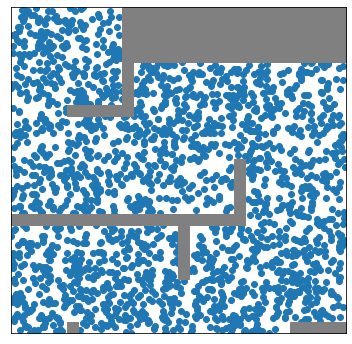

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [14]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

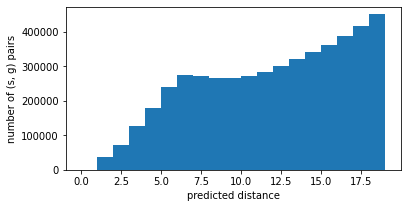

In [15]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Tune edge cutoff

Plotting 211 nodes and 5381 edges


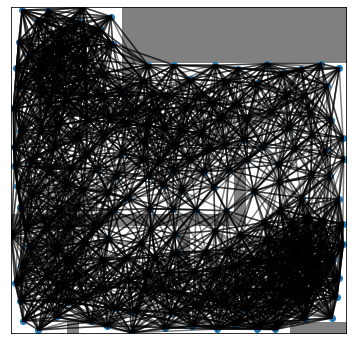

In [17]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=30) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=30)

from sgm.utils.visualization import *
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 211 nodes and 1477 edges


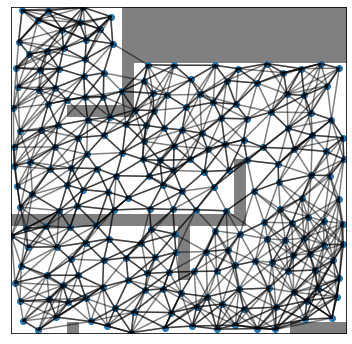

In [18]:
search_policy.keep_k_nearest(7)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 211 nodes and 1266 edges


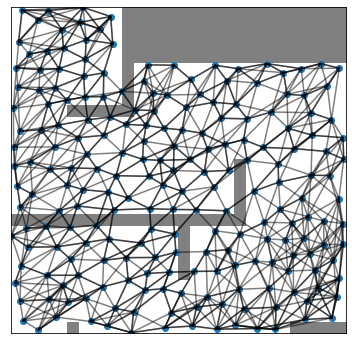

In [19]:
search_policy.keep_k_nearest(6)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 211 nodes and 1055 edges


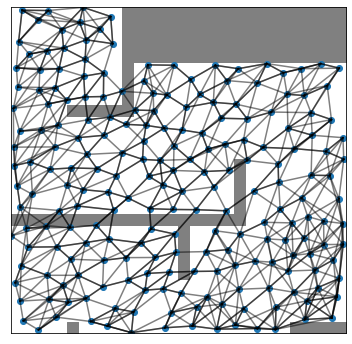

In [20]:
search_policy.keep_k_nearest(5)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 211 nodes and 844 edges


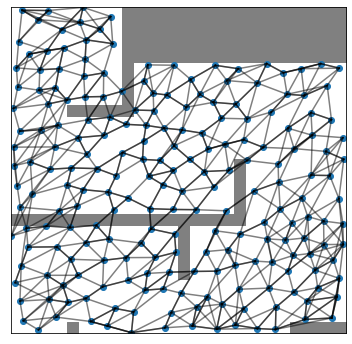

In [21]:
search_policy.keep_k_nearest(4)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 211 nodes and 633 edges


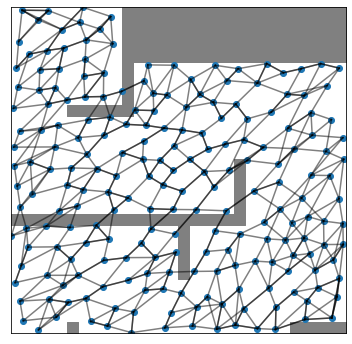

In [22]:
search_policy.keep_k_nearest(3)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 211 nodes and 422 edges


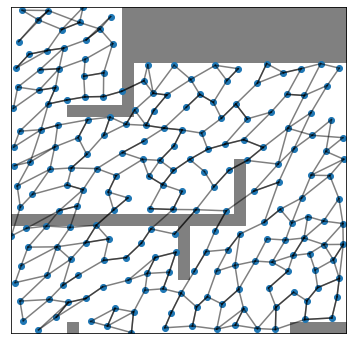

In [23]:
search_policy.keep_k_nearest(2)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 211 nodes and 211 edges


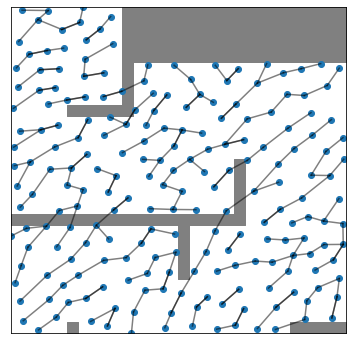

In [24]:
search_policy.keep_k_nearest(1)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

# Calculate Euclidean distances

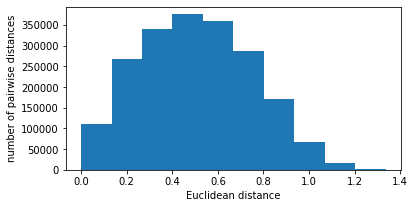

In [25]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SGM search policy

In [26]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=30) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=30)

# Cleanup and evaluate SGM

In [27]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 0.00
Evaluated initial SGM success rate in 655.15 seconds
After filtering and 0 cleanup steps, SGM has success rate 0.00
Took 5000 cleanup steps and evaluated SGM success rate in 1069.52 seconds
After filtering and 5000 cleanup steps, SGM has success rate 0.00
Took 5000 cleanup steps and evaluated SGM success rate in 1060.31 seconds
After filtering and 10000 cleanup steps, SGM has success rate 0.55
Took 5000 cleanup steps and evaluated SGM success rate in 932.38 seconds
After filtering and 15000 cleanup steps, SGM has success rate 0.65
Took 5000 cleanup steps and evaluated SGM success rate in 899.06 seconds
After filtering and 20000 cleanup steps, SGM has success rate 0.30
Took 5000 cleanup steps and evaluated SGM success rate in 950.71 seconds
After filtering and 25000 cleanup steps, SGM has success rate 0.55
Took 5000 cleanup steps and evaluated SGM success rate in 955.86 seconds
After filtering and 30000 cleanup steps, SGM has success rate 0.50
Took 5000

# Load cleanup graphs

In [28]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

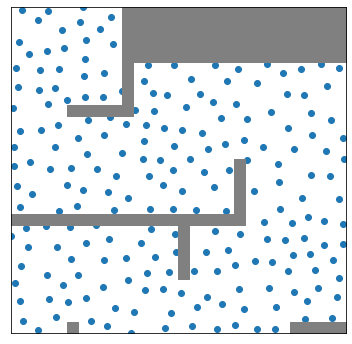

In [29]:
plot_points(search_policy.rb_vec, eval_tf_env)

Plotting 211 nodes and 5381 edges


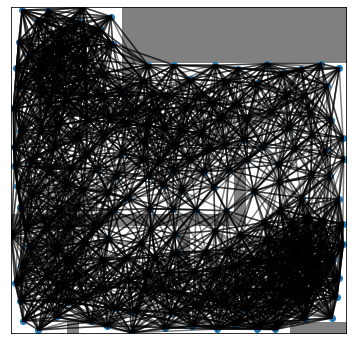

In [30]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

Plotting 211 nodes and 1055 edges


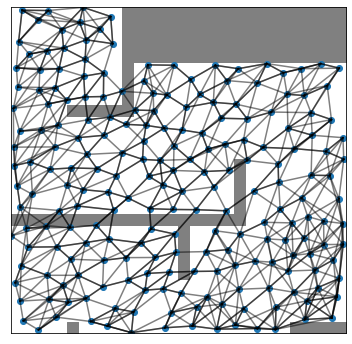

In [31]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

Plotting 211 nodes and 999 edges


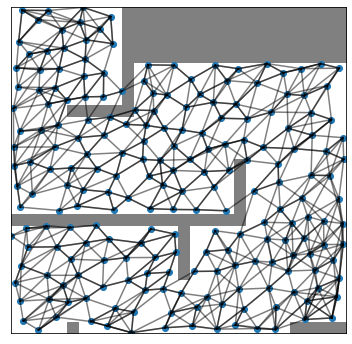

In [32]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

Plotting 211 nodes and 56 edges


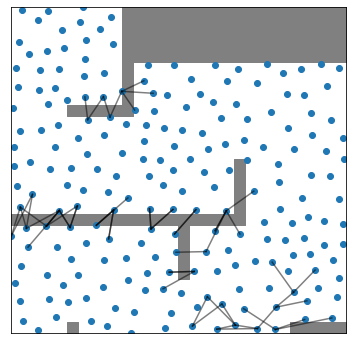

In [33]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)